# **Trisyura BHC - RISTEK Datathon 2024**

Team:
1. Regi Muhammar - Linkedin: https://www.linkedin.com/in/regimuhammar/
2. Ahmad Khoiru Shofa - Linkedin: https://www.linkedin.com/in/ahmad-khoiru-shofa/
3. M. Alfan Tsalits - Linkedin: https://www.linkedin.com/in/m-alfan/

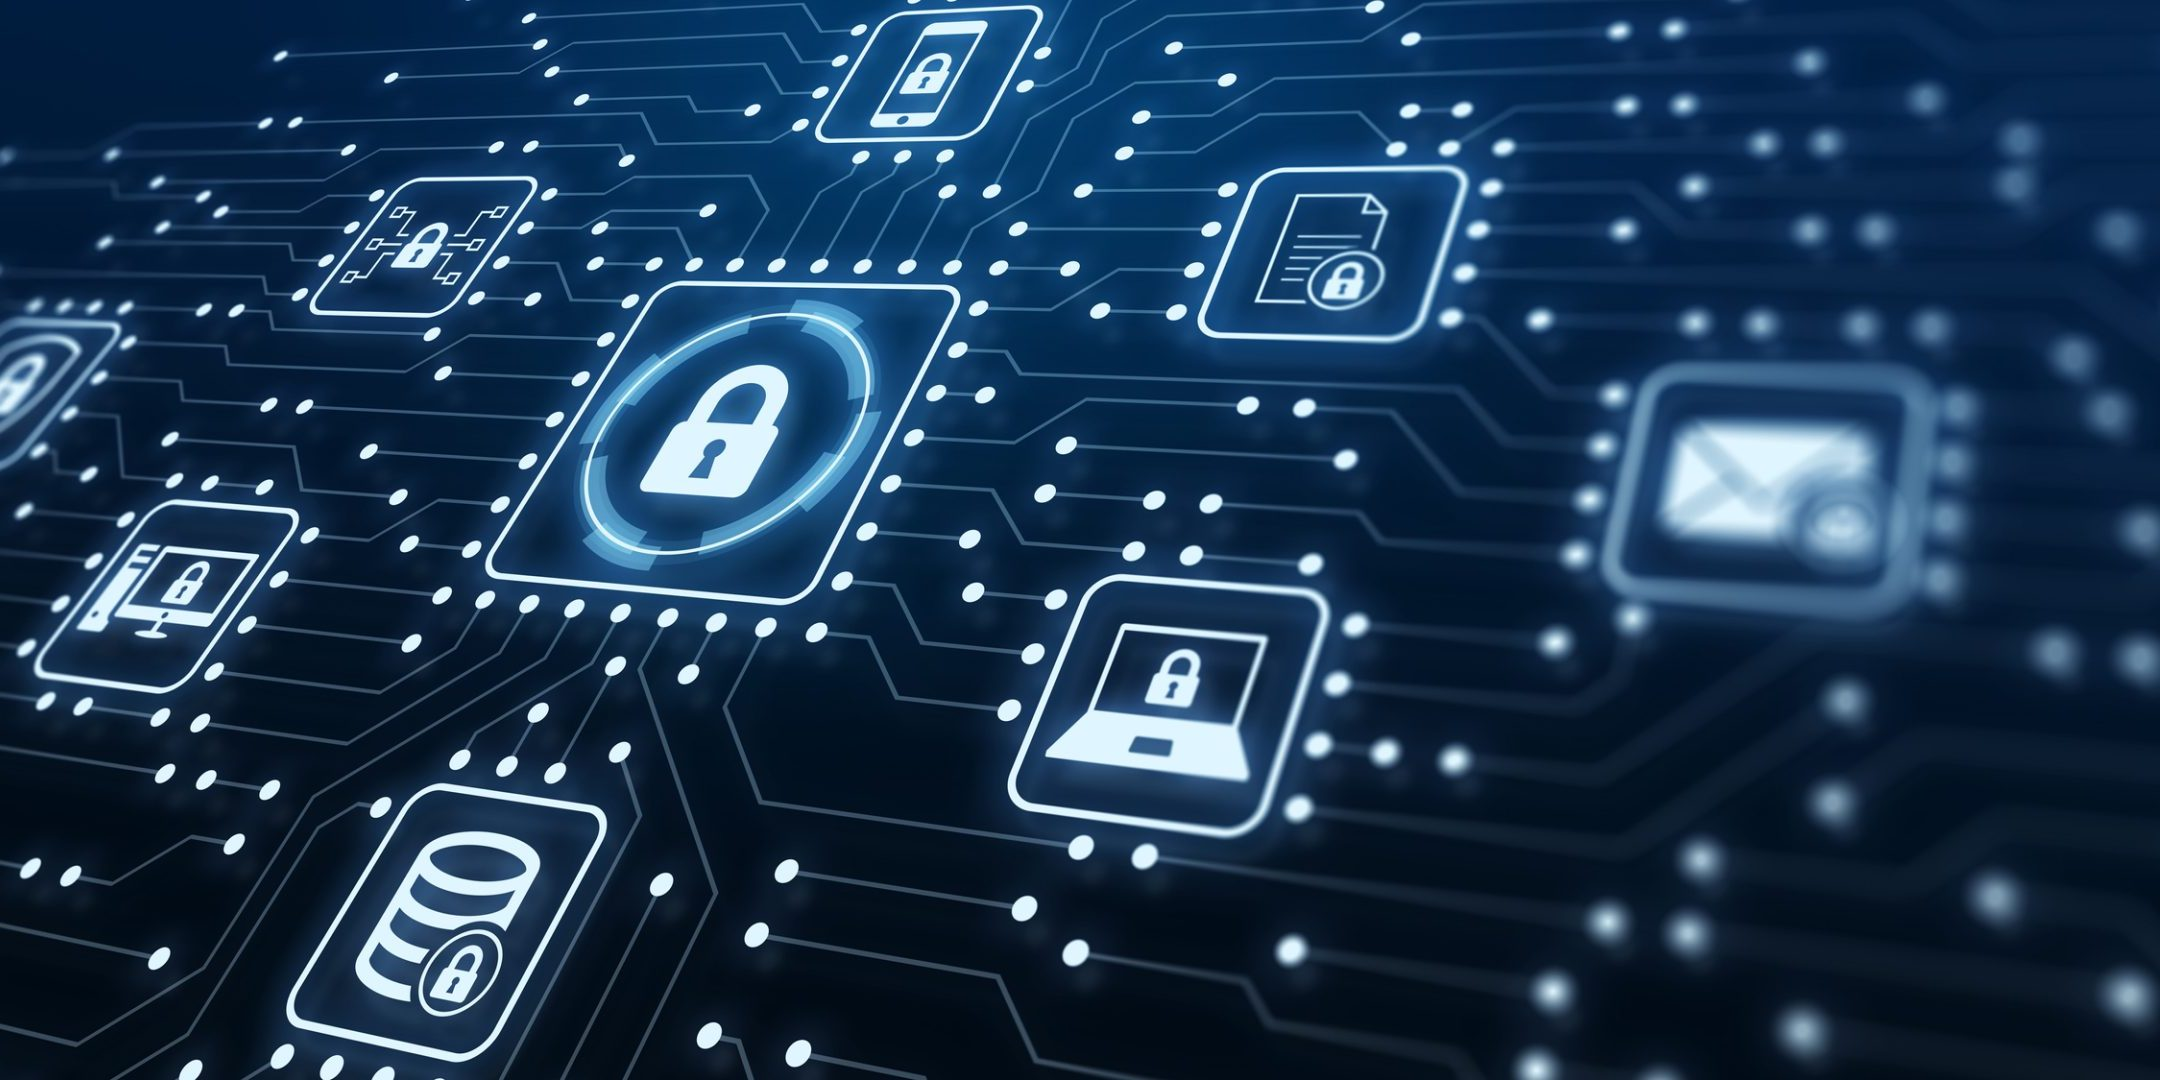

# PENDAHULUAN

**Tujuan Kompetisi**<br>
Objektif dari kompetisi ini adalah untuk mengembangkan model machine learning untuk deteksi fraud pada pengguna platform fintech. Segala metode machine learning, matematis, dan statistik dapat digunakan untuk meningkatkan performa dari model yang dipakai. Selain mengembangkan model klasifikasi, kemampuan analisis mengenai pola pengguna yang teridentifikasi sebagai fraud juga diperlukan untuk menjelaskan cara kerja model yang dipakai.

<br>

**Apa itu fraud detection?**<br>
Fraud detection adalah proses identifikasi tindakan pengguna pada suatu skenario termasuk sebagai tindakan penipuan atau bukan. Dalam konteks kompetisi ini, tindakan penipuan didefinisikan sebagai pengguna platform yang telah meminjam produk keuangan tetapi tercatat belum melakukan pembayaran sampai tenggat waktu yang telah ditentukan.

Data kompetisi ini diambil dari catatan peminjaman produk keuangan pada salah satu perusahaan fintech.

Deskripsi Dataset
Dataset kompetisi berisi lima berkas csv dengan detail sebagai berikut:
<br>
<br>
**train.csv**
<br> - Data berisi data pengguna untuk training model.

***user_id:*** ID pengguna.<br>
***pc[0-16]:*** Kumpulan fitur identitas pengguna yang sengaja dikaburkan untuk anonimitas.<br>
***label:*** Target klasifikasi pengguna (0: Non-fraud; 1: Fraud).
<br>
<br>
**loan_activities.csv**
<br> - Data berisi catatan peminjaman produk keuangan pada platform.

***user_id:*** ID pengguna.<br>
***reference_contact:*** Pengguna lain yang dijadikan kontak darurat.<br>
***loan_type:*** Tipe pinjaman yang dipesan oleh pengguna.<br>
***ts:*** Timestamp saat pengguna membuat pinjaman.
<br>
<br>
**non_borrower_user.csv**
<br> - Data berisi data pengguna yang tidak dijadikan target klasifikasi karena cenderung jarang melakukan pinjaman

***user_id:*** ID pengguna.<br>
***pc[0-16]:*** Kumpulan fitur identitas pengguna yang sengaja dikaburkan untuk anonimitas.
<br>
<br>
**test.csv**
<br> - Data berisi data pengguna untuk dilakukan prediksi pada submisi.

***user_id:*** ID pengguna yang bersesuaian dengan sample_submission.csv.<br>
***pc[0-16]:*** Kumpulan fitur identitas pengguna yang sengaja dikaburkan untuk anonimitas.
<br>
<br>
**sample_submission.csv**
<br> - Data berisi contoh submisi.

***user_id:*** ID pengguna yang bersesuaian dengan test.csv.<br>
***label:*** Target klasifikasi pengguna (0: Non-fraud; 1: Fraud).

## Library Requirement

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Data

Download Data from Ristek Gdrive

In [ ]:
# !pip install gdown

# import os
# import gdown
# import zipfile
# import logging
# from genericpath import isdir

# def download_data(url, filename, dir_name: str = "data") -> None:
#     if not os.path.isdir(dir_name):
#         os.mkdir(dir_name)
#     os.chdir(dir_name)
#     logging.info("Downloading data....")
#     gdown.download(
#         url, quiet=False
#     )
#     logging.info("Extracting zip file....")
#     with zipfile.ZipFile(f"{filename}.zip", 'r') as zip_ref:
#         zip_ref.extractall(filename)
#     os.remove(f"{filename}.zip")
#     os.chdir("..")

# download_data(url="https://drive.google.com/uc?&id=1joOspf-LvEBdKLw48S2WeBno_l5J1DPj",
#               filename="ristek-datathon-2024",
#               dir_name="datathon-2024")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Data Train

In [ ]:
# Loading Data
data = pd.read_csv('/content/drive/MyDrive/dataset/DatathonRistek24/train.csv')
data

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label
0,3,1.0,1.0,0.275,0.255,0.927273,0.4,0.260,0.040,0.254,0.976923,1.0,0.072727,0.023077,0.078431,0.750000,0.018182,0.250000,0
1,5,0.0,0.0,0.430,0.365,0.848837,0.4,1.253,0.210,1.235,0.985634,1.0,0.151163,0.014366,0.054795,0.500000,0.011628,0.250000,0
2,9,1.0,3.0,1.315,0.825,0.627376,0.9,2.385,0.128,2.270,0.951782,1.0,0.372624,0.048218,0.054545,0.777778,0.003802,0.111111,0
3,10,0.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
4,17,1.0,1.0,0.235,0.160,0.680851,0.1,0.120,0.002,0.104,0.866667,0.0,0.319149,0.133333,0.031250,-1.000000,-1.000000,-1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857894,3700529,1.0,4.0,0.190,0.160,0.842105,0.1,0.281,0.005,0.274,0.975089,0.0,0.157895,0.024911,0.031250,1.000000,-1.000000,-1.000000,0
857895,3700532,1.0,3.0,1.710,1.535,0.897661,2.1,3.750,0.687,3.712,0.989867,4.0,0.102339,0.010133,0.068404,0.857143,0.011696,0.190476,0
857896,3700537,1.0,0.0,2.165,2.060,0.951501,2.4,2.213,0.065,2.186,0.987799,2.0,0.048499,0.012201,0.058252,0.458333,0.004619,0.083333,0
857897,3700543,1.0,5.0,2.075,1.565,0.754217,1.9,3.292,0.342,3.188,0.968408,4.0,0.245783,0.031592,0.060703,0.736842,0.009639,0.210526,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857899 entries, 0 to 857898
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  857899 non-null  int64  
 1   pc0      857899 non-null  float64
 2   pc1      857899 non-null  float64
 3   pc2      857899 non-null  float64
 4   pc3      857899 non-null  float64
 5   pc4      857899 non-null  float64
 6   pc5      857899 non-null  float64
 7   pc6      857899 non-null  float64
 8   pc7      857899 non-null  float64
 9   pc8      857899 non-null  float64
 10  pc9      857899 non-null  float64
 11  pc10     857899 non-null  float64
 12  pc11     857899 non-null  float64
 13  pc12     857899 non-null  float64
 14  pc13     857899 non-null  float64
 15  pc14     857899 non-null  float64
 16  pc15     857899 non-null  float64
 17  pc16     857899 non-null  float64
 18  label    857899 non-null  int64  
dtypes: float64(17), int64(2)
memory usage: 124.4 MB


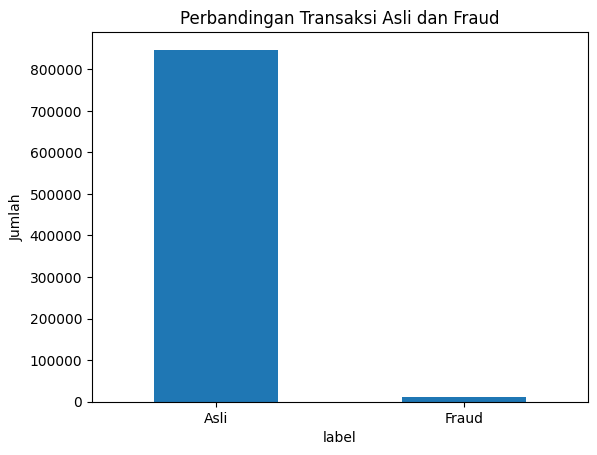

In [ ]:
labels = ["Asli", "Fraud"]
count_classes = data.value_counts(data['label'], sort=True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Perbandingan Transaksi Asli dan Fraud")
plt.ylabel("Jumlah")
plt.xticks(range(2), labels)
plt.show()

# Feature Engineer data loan activites
adding column reference contact, loan_type and time activities groupby user_id

In [ ]:
# Load and transform data loan activities
file_path = '/content/drive/MyDrive/dataset/DatathonRistek24/loan_activities.csv'
data = pd.read_csv(file_path)


transformed_rows = []
# Create an empty DataFrame for the transformed data
columns = ['user_id',
           'reference_contact1', 'reference_contact2', 'reference_contact3', 'reference_contact4', 'reference_contact5', 'reference_contact6',
           'loan_type1', 'loan_type2', 'loan_type3', 'loan_type4', 'loan_type5', 'loan_type6',
           'ts1', 'ts2', 'ts3', 'ts4', 'ts5','ts6']
transformed_data = pd.DataFrame(columns=columns)

# Group by user_id
grouped = data.groupby('user_id')

# Iterate over each group
for user_id, group in grouped:
    # Initialize the row dictionary with user_id and -1 for other fields
    row = {'user_id': user_id,
           'reference_contact1': -1, 'reference_contact2': -1, 'reference_contact3': -1, 'reference_contact4': -1, 'reference_contact5': -1, 'reference_contact6':-1,
           'loan_type1': -1, 'loan_type2': -1, 'loan_type3': -1, 'loan_type4': -1, 'loan_type5': -1, 'loan_type6': -1,
           'ts1': -1, 'ts2': -1, 'ts3': -1, 'ts4': -1, 'ts5': -1, 'ts6': -1}

    # Fill the row dictionary with the user's loan activities
    for i, (_, row_data) in enumerate(group.iterrows()):
        if i < 6:
            row[f'reference_contact{i+1}'] = row_data['reference_contact']
            row[f'loan_type{i+1}'] = row_data['loan_type']
            row[f'ts{i+1}'] = row_data['ts']

    # Append the row to the list of transformed rows
    transformed_rows.append(row)

# Convert the list of transformed rows into a DataFrame
transformed_data = pd.DataFrame(transformed_rows, columns=columns)

In [ ]:
transformed_data.to_csv('transformed_loan_activities', index=False)

In [ ]:
transform = pd.read_csv('/content/drive/MyDrive/dataset/transformed_loan_activities.csv')
transform

,user_id,reference_contact1,reference_contact2,reference_contact3,reference_contact4,reference_contact5,reference_contact6,loan_type1,loan_type2,loan_type3,loan_type4,loan_type5,loan_type6,ts1,ts2,ts3,ts4,ts5,ts6
0,1,2592936,-1,-1,-1,-1,-1,2,-1,-1,-1,-1,-1,423,-1,-1,-1,-1,-1
1,5,2191460,176154,-1,-1,-1,-1,5,10,-1,-1,-1,-1,759,116,-1,-1,-1,-1
2,7,2265784,-1,-1,-1,-1,-1,11,-1,-1,-1,-1,-1,594,-1,-1,-1,-1,-1
3,9,1611064,609079,3574121,-1,-1,-1,4,4,5,-1,-1,-1,350,153,450,-1,-1,-1
4,10,628385,681419,-1,-1,-1,-1,4,4,-1,-1,-1,-1,752,364,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190657,3700543,766955,-1,-1,-1,-1,-1,6,-1,-1,-1,-1,-1,393,-1,-1,-1,-1,-1
2190658,3700544,2921812,2561688,1656022,-1,-1,-1,1,5,6,-1,-1,-1,259,521,259,-1,-1,-1
2190659,3700546,2059738,-1,-1,-1,-1,-1,4,-1,-1,-1,-1,-1,665,-1,-1,-1,-1,-1
2190660,3700547,1334850,376240,-1,-1,-1,-1,5,5,-1,-1,-1,-1,505,505,-1,-1,-1,-1


In [ ]:
# Merge data train and trainsform data
merged_df = pd.merge(data, transform, on='user_id', how='left')

merged_df

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,loan_type3,loan_type4,loan_type5,loan_type6,ts1,ts2,ts3,ts4,ts5,ts6
0,3,1.0,1.0,0.275,0.255,0.927273,0.4,0.260,0.040,0.254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,0.0,0.0,0.430,0.365,0.848837,0.4,1.253,0.210,1.235,...,-1.0,-1.0,-1.0,-1.0,759.0,116.0,-1.0,-1.0,-1.0,-1.0
2,9,1.0,3.0,1.315,0.825,0.627376,0.9,2.385,0.128,2.270,...,5.0,-1.0,-1.0,-1.0,350.0,153.0,450.0,-1.0,-1.0,-1.0
3,10,0.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.0,-1.0,-1.0,-1.0,752.0,364.0,-1.0,-1.0,-1.0,-1.0
4,17,1.0,1.0,0.235,0.160,0.680851,0.1,0.120,0.002,0.104,...,-1.0,-1.0,-1.0,-1.0,120.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857894,3700529,1.0,4.0,0.190,0.160,0.842105,0.1,0.281,0.005,0.274,...,-1.0,-1.0,-1.0,-1.0,78.0,-1.0,-1.0,-1.0,-1.0,-1.0
857895,3700532,1.0,3.0,1.710,1.535,0.897661,2.1,3.750,0.687,3.712,...,6.0,-1.0,-1.0,-1.0,394.0,113.0,394.0,-1.0,-1.0,-1.0
857896,3700537,1.0,0.0,2.165,2.060,0.951501,2.4,2.213,0.065,2.186,...,-1.0,-1.0,-1.0,-1.0,117.0,-1.0,-1.0,-1.0,-1.0,-1.0
857897,3700543,1.0,5.0,2.075,1.565,0.754217,1.9,3.292,0.342,3.188,...,-1.0,-1.0,-1.0,-1.0,393.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
# Filling Missing Value on Merge Data
merged_df['reference_contact1'] = merged_df['reference_contact1'].fillna(-1.0)
merged_df['loan_type1'] = merged_df['loan_type1'].fillna(-1.0)
merged_df['ts1'] = merged_df['ts1'].fillna(-1.0)
merged_df['reference_contact2'] = merged_df['reference_contact2'].fillna(-1.0)
merged_df['loan_type2'] = merged_df['loan_type2'].fillna(-1.0)
merged_df['ts2'] = merged_df['ts2'].fillna(-1.0)
merged_df['reference_contact3'] = merged_df['reference_contact3'].fillna(-1.0)
merged_df['loan_type3'] = merged_df['loan_type3'].fillna(-1.0)
merged_df['ts3'] = merged_df['ts3'].fillna(-1.0)
merged_df['reference_contact4'] = merged_df['reference_contact4'].fillna(-1.0)
merged_df['loan_type4'] = merged_df['loan_type4'].fillna(-1.0)
merged_df['ts4'] = merged_df['ts4'].fillna(-1.0)
merged_df['reference_contact5'] = merged_df['reference_contact5'].fillna(-1.0)
merged_df['loan_type5'] = merged_df['loan_type5'].fillna(-1.0)
merged_df['ts5'] = merged_df['ts5'].fillna(-1.0)
merged_df['reference_contact6'] = merged_df['reference_contact6'].fillna(-1.0)
merged_df['loan_type6'] = merged_df['loan_type6'].fillna(-1.0)
merged_df['ts6'] = merged_df['ts6'].fillna(-1.0)

In [ ]:
merged_df

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,loan_type3,loan_type4,loan_type5,loan_type6,ts1,ts2,ts3,ts4,ts5,ts6
0,3,1.0,1.0,0.275,0.255,0.927273,0.4,0.260,0.040,0.254,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,5,0.0,0.0,0.430,0.365,0.848837,0.4,1.253,0.210,1.235,...,-1.0,-1.0,-1.0,-1.0,759.0,116.0,-1.0,-1.0,-1.0,-1.0
2,9,1.0,3.0,1.315,0.825,0.627376,0.9,2.385,0.128,2.270,...,5.0,-1.0,-1.0,-1.0,350.0,153.0,450.0,-1.0,-1.0,-1.0
3,10,0.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.0,-1.0,-1.0,-1.0,752.0,364.0,-1.0,-1.0,-1.0,-1.0
4,17,1.0,1.0,0.235,0.160,0.680851,0.1,0.120,0.002,0.104,...,-1.0,-1.0,-1.0,-1.0,120.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857894,3700529,1.0,4.0,0.190,0.160,0.842105,0.1,0.281,0.005,0.274,...,-1.0,-1.0,-1.0,-1.0,78.0,-1.0,-1.0,-1.0,-1.0,-1.0
857895,3700532,1.0,3.0,1.710,1.535,0.897661,2.1,3.750,0.687,3.712,...,6.0,-1.0,-1.0,-1.0,394.0,113.0,394.0,-1.0,-1.0,-1.0
857896,3700537,1.0,0.0,2.165,2.060,0.951501,2.4,2.213,0.065,2.186,...,-1.0,-1.0,-1.0,-1.0,117.0,-1.0,-1.0,-1.0,-1.0,-1.0
857897,3700543,1.0,5.0,2.075,1.565,0.754217,1.9,3.292,0.342,3.188,...,-1.0,-1.0,-1.0,-1.0,393.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
# Checking Missing Value on Merge Data
merged_df.isnull().sum()

user_id               0
pc0                   0
pc1                   0
pc2                   0
pc3                   0
pc4                   0
pc5                   0
pc6                   0
pc7                   0
pc8                   0
pc9                   0
pc10                  0
pc11                  0
pc12                  0
pc13                  0
pc14                  0
pc15                  0
pc16                  0
label                 0
reference_contact1    0
reference_contact2    0
reference_contact3    0
reference_contact4    0
reference_contact5    0
reference_contact6    0
loan_type1            0
loan_type2            0
loan_type3            0
loan_type4            0
loan_type5            0
loan_type6            0
ts1                   0
ts2                   0
ts3                   0
ts4                   0
ts5                   0
ts6                   0
dtype: int64

In [ ]:
transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190662 entries, 0 to 2190661
Data columns (total 19 columns):
 #   Column              Dtype
---  ------              -----
 0   user_id             int64
 1   reference_contact1  int64
 2   reference_contact2  int64
 3   reference_contact3  int64
 4   reference_contact4  int64
 5   reference_contact5  int64
 6   reference_contact6  int64
 7   loan_type1          int64
 8   loan_type2          int64
 9   loan_type3          int64
 10  loan_type4          int64
 11  loan_type5          int64
 12  loan_type6          int64
 13  ts1                 int64
 14  ts2                 int64
 15  ts3                 int64
 16  ts4                 int64
 17  ts5                 int64
 18  ts6                 int64
dtypes: int64(19)
memory usage: 317.6 MB


# Load Loan Activites to count activites each user

In [ ]:
data_loan = pd.read_csv('/content/drive/MyDrive/dataset/DatathonRistek24/loan_activities.csv')
data_loan.head()

,user_id,reference_contact,loan_type,ts
0,2223129,903716,1,671
1,1380939,484583,1,89
2,2724411,1185034,1,230
3,2401751,1369254,1,120
4,1982168,21797,1,57


In [ ]:
# Count loan activites User
count_loan = pd.DataFrame(data_loan['user_id'].value_counts())
count_loan

,count
user_id,
3563530,6
1988848,6
1161522,6
1179599,6
1118722,6
...,...
1446673,1
543720,1
896505,1


In [ ]:
# adding count loan activites to merge data
merged_ada_count = pd.merge(merged_df, count_loan, on='user_id', how='left')
merged_ada_count

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,loan_type4,loan_type5,loan_type6,ts1,ts2,ts3,ts4,ts5,ts6,count
0,3,1.0,1.0,0.275,0.255,0.927273,0.4,0.260,0.040,0.254,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
1,5,0.0,0.0,0.430,0.365,0.848837,0.4,1.253,0.210,1.235,...,-1.0,-1.0,-1.0,759.0,116.0,-1.0,-1.0,-1.0,-1.0,2.0
2,9,1.0,3.0,1.315,0.825,0.627376,0.9,2.385,0.128,2.270,...,-1.0,-1.0,-1.0,350.0,153.0,450.0,-1.0,-1.0,-1.0,3.0
3,10,0.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.0,-1.0,-1.0,752.0,364.0,-1.0,-1.0,-1.0,-1.0,2.0
4,17,1.0,1.0,0.235,0.160,0.680851,0.1,0.120,0.002,0.104,...,-1.0,-1.0,-1.0,120.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857894,3700529,1.0,4.0,0.190,0.160,0.842105,0.1,0.281,0.005,0.274,...,-1.0,-1.0,-1.0,78.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
857895,3700532,1.0,3.0,1.710,1.535,0.897661,2.1,3.750,0.687,3.712,...,-1.0,-1.0,-1.0,394.0,113.0,394.0,-1.0,-1.0,-1.0,3.0
857896,3700537,1.0,0.0,2.165,2.060,0.951501,2.4,2.213,0.065,2.186,...,-1.0,-1.0,-1.0,117.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
857897,3700543,1.0,5.0,2.075,1.565,0.754217,1.9,3.292,0.342,3.188,...,-1.0,-1.0,-1.0,393.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0


In [ ]:
# fill 0 for user not doing loan activities
merged_ada_count['count'] = merged_ada_count['count'].fillna(0)
merged_ada_count

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,loan_type4,loan_type5,loan_type6,ts1,ts2,ts3,ts4,ts5,ts6,count
0,3,1.0,1.0,0.275,0.255,0.927273,0.4,0.260,0.040,0.254,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
1,5,0.0,0.0,0.430,0.365,0.848837,0.4,1.253,0.210,1.235,...,-1.0,-1.0,-1.0,759.0,116.0,-1.0,-1.0,-1.0,-1.0,2.0
2,9,1.0,3.0,1.315,0.825,0.627376,0.9,2.385,0.128,2.270,...,-1.0,-1.0,-1.0,350.0,153.0,450.0,-1.0,-1.0,-1.0,3.0
3,10,0.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.0,-1.0,-1.0,752.0,364.0,-1.0,-1.0,-1.0,-1.0,2.0
4,17,1.0,1.0,0.235,0.160,0.680851,0.1,0.120,0.002,0.104,...,-1.0,-1.0,-1.0,120.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857894,3700529,1.0,4.0,0.190,0.160,0.842105,0.1,0.281,0.005,0.274,...,-1.0,-1.0,-1.0,78.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
857895,3700532,1.0,3.0,1.710,1.535,0.897661,2.1,3.750,0.687,3.712,...,-1.0,-1.0,-1.0,394.0,113.0,394.0,-1.0,-1.0,-1.0,3.0
857896,3700537,1.0,0.0,2.165,2.060,0.951501,2.4,2.213,0.065,2.186,...,-1.0,-1.0,-1.0,117.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
857897,3700543,1.0,5.0,2.075,1.565,0.754217,1.9,3.292,0.342,3.188,...,-1.0,-1.0,-1.0,393.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0


In [ ]:
for column in merged_df.columns:
    print(merged_ada_count[column].value_counts())
    print("------------------------------------")

user_id
3          1
2469656    1
2469766    1
2469772    1
2469774    1
          ..
1233121    1
1233122    1
1233128    1
1233130    1
3700548    1
Name: count, Length: 857899, dtype: int64
------------------------------------
pc0
 1.0    642512
 0.0    213614
-1.0      1773
Name: count, dtype: int64
------------------------------------
pc1
 3.0    188164
 4.0    152179
 5.0    142543
 2.0    113366
 1.0     83841
 6.0     68700
 7.0     41545
 8.0     35532
 0.0     30255
-1.0      1774
Name: count, dtype: int64
------------------------------------
pc2
-1.000     305125
 0.235       1979
 0.340       1908
 0.275       1907
 0.305       1890
            ...  
 23.265         1
 14.940         1
 16.060         1
 34.115         1
 16.595         1
Name: count, Length: 4019, dtype: int64
------------------------------------
pc3
-1.000     305477
 0.240       2417
 0.220       2385
 0.210       2369
 0.250       2368
            ...  
 11.460         1
 23.150         1
 22.915       

In [ ]:
merged_ada_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857899 entries, 0 to 857898
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             857899 non-null  int64  
 1   pc0                 857899 non-null  float64
 2   pc1                 857899 non-null  float64
 3   pc2                 857899 non-null  float64
 4   pc3                 857899 non-null  float64
 5   pc4                 857899 non-null  float64
 6   pc5                 857899 non-null  float64
 7   pc6                 857899 non-null  float64
 8   pc7                 857899 non-null  float64
 9   pc8                 857899 non-null  float64
 10  pc9                 857899 non-null  float64
 11  pc10                857899 non-null  float64
 12  pc11                857899 non-null  float64
 13  pc12                857899 non-null  float64
 14  pc13                857899 non-null  float64
 15  pc14                857899 non-nul

In [ ]:
# df_drop = merged_df.drop(columns=['pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16'])
# df_drop.head()

,user_id,label,reference_contact1,reference_contact2,reference_contact3,reference_contact4,reference_contact5,reference_contact6,loan_type1,loan_type2,loan_type3,loan_type4,loan_type5,loan_type6,ts1,ts2,ts3,ts4,ts5,ts6
0,3,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,5,0,2191460.0,176154.0,-1.0,-1.0,-1.0,-1.0,5.0,10.0,-1.0,-1.0,-1.0,-1.0,759.0,116.0,-1.0,-1.0,-1.0,-1.0
2,9,0,1611064.0,609079.0,3574121.0,-1.0,-1.0,-1.0,4.0,4.0,5.0,-1.0,-1.0,-1.0,350.0,153.0,450.0,-1.0,-1.0,-1.0
3,10,0,628385.0,681419.0,-1.0,-1.0,-1.0,-1.0,4.0,4.0,-1.0,-1.0,-1.0,-1.0,752.0,364.0,-1.0,-1.0,-1.0,-1.0
4,17,0,3241259.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,120.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
# #melihat korelasi antar kolom
# import seaborn as sns
# import matplotlib.pyplot as plt

# corelation = df_drop.corr()
# plt.figure(figsize = (20,20))
# sns.heatmap(corelation, cmap ='RdBu', annot = True )
# plt.show()

###Data Non Borrower User

In [ ]:
data_non_borrower = pd.read_csv('/content/drive/MyDrive/dataset/DatathonRistek24/non_borrower_user.csv')
data_non_borrower

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
0,0,1.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,1,0.0,8.0,0.630,0.565,0.896825,0.6,2.298,0.210,2.284,0.993908,1.0,0.103175,0.006092,0.053097,1.000000,0.007937,0.166667
2,2,-1.0,-1.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
3,6,0.0,1.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
4,7,1.0,6.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474944,3700542,1.0,7.0,0.540,0.485,0.898148,0.9,1.186,0.117,1.141,0.962057,2.0,0.101852,0.037943,0.092784,0.777778,0.018519,0.222222
2474945,3700545,1.0,7.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2474946,3700546,1.0,1.0,0.125,0.125,1.000000,-1.0,0.120,-1.000,0.120,1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2474947,3700547,1.0,0.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


### Data Test

Melakukan Preprocessing yang sama terhadap train.csv

In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/dataset/DatathonRistek24/test.csv')
data_test

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
0,4,1.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,13,1.0,5.0,0.445,0.420,0.943820,0.8,0.783,0.234,0.778,0.993614,2.0,0.056180,0.006386,0.095238,0.750000,0.022472,0.250000
2,37,1.0,6.0,1.680,1.080,0.642857,0.6,1.167,0.046,1.007,0.862896,1.0,0.357143,0.137104,0.027778,0.500000,0.002976,0.166667
3,61,0.0,3.0,1.505,0.875,0.581395,0.9,0.425,0.012,0.286,0.672941,1.0,0.418605,0.327059,0.051429,0.333333,0.003322,0.111111
4,66,1.0,5.0,2.210,1.075,0.486425,1.0,1.349,0.087,1.015,0.752409,2.0,0.513575,0.247591,0.046512,0.800000,0.004525,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367697,3700510,1.0,1.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
367698,3700517,0.0,6.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
367699,3700526,0.0,1.0,0.220,0.195,0.886364,0.1,0.074,0.002,0.066,0.891892,0.0,0.113636,0.108108,0.025641,-1.000000,-1.000000,-1.000000
367700,3700539,1.0,4.0,2.440,2.295,0.940574,1.8,5.874,0.248,5.640,0.960163,7.0,0.059426,0.039837,0.039216,0.777778,0.014344,0.388889


In [ ]:
merged_test = pd.merge(data_test, transform, on='user_id', how='left')

merged_test

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,loan_type3,loan_type4,loan_type5,loan_type6,ts1,ts2,ts3,ts4,ts5,ts6
0,4,1.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13,1.0,5.0,0.445,0.420,0.943820,0.8,0.783,0.234,0.778,...,-1.0,-1.0,-1.0,-1.0,340.0,340.0,-1.0,-1.0,-1.0,-1.0
2,37,1.0,6.0,1.680,1.080,0.642857,0.6,1.167,0.046,1.007,...,-1.0,-1.0,-1.0,-1.0,60.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,61,0.0,3.0,1.505,0.875,0.581395,0.9,0.425,0.012,0.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66,1.0,5.0,2.210,1.075,0.486425,1.0,1.349,0.087,1.015,...,-1.0,-1.0,-1.0,-1.0,505.0,483.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367697,3700510,1.0,1.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367698,3700517,0.0,6.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.0,-1.0,-1.0,-1.0,111.0,111.0,-1.0,-1.0,-1.0,-1.0
367699,3700526,0.0,1.0,0.220,0.195,0.886364,0.1,0.074,0.002,0.066,...,11.0,-1.0,-1.0,-1.0,98.0,99.0,99.0,-1.0,-1.0,-1.0
367700,3700539,1.0,4.0,2.440,2.295,0.940574,1.8,5.874,0.248,5.640,...,10.0,-1.0,-1.0,-1.0,234.0,415.0,242.0,-1.0,-1.0,-1.0


In [ ]:
merged_test['reference_contact1'] = merged_test['reference_contact1'].fillna(-1.0)
merged_test['loan_type1'] = merged_test['loan_type1'].fillna(-1.0)
merged_test['ts1'] = merged_test['ts1'].fillna(-1.0)
merged_test['reference_contact2'] = merged_test['reference_contact2'].fillna(-1.0)
merged_test['loan_type2'] = merged_test['loan_type2'].fillna(-1.0)
merged_test['ts2'] = merged_test['ts2'].fillna(-1.0)
merged_test['reference_contact3'] = merged_test['reference_contact3'].fillna(-1.0)
merged_test['loan_type3'] = merged_test['loan_type3'].fillna(-1.0)
merged_test['ts3'] = merged_test['ts3'].fillna(-1.0)
merged_test['reference_contact4'] = merged_test['reference_contact4'].fillna(-1.0)
merged_test['loan_type4'] = merged_test['loan_type4'].fillna(-1.0)
merged_test['ts4'] = merged_test['ts4'].fillna(-1.0)
merged_test['reference_contact5'] = merged_test['reference_contact5'].fillna(-1.0)
merged_test['loan_type5'] = merged_test['loan_type5'].fillna(-1.0)
merged_test['ts5'] = merged_test['ts5'].fillna(-1.0)
merged_test['reference_contact6'] = merged_test['reference_contact6'].fillna(-1.0)
merged_test['loan_type6'] = merged_test['loan_type6'].fillna(-1.0)
merged_test['ts6'] = merged_test['ts6'].fillna(-1.0)

In [ ]:
merged_test

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,loan_type3,loan_type4,loan_type5,loan_type6,ts1,ts2,ts3,ts4,ts5,ts6
0,4,1.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,13,1.0,5.0,0.445,0.420,0.943820,0.8,0.783,0.234,0.778,...,-1.0,-1.0,-1.0,-1.0,340.0,340.0,-1.0,-1.0,-1.0,-1.0
2,37,1.0,6.0,1.680,1.080,0.642857,0.6,1.167,0.046,1.007,...,-1.0,-1.0,-1.0,-1.0,60.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,61,0.0,3.0,1.505,0.875,0.581395,0.9,0.425,0.012,0.286,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,66,1.0,5.0,2.210,1.075,0.486425,1.0,1.349,0.087,1.015,...,-1.0,-1.0,-1.0,-1.0,505.0,483.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367697,3700510,1.0,1.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
367698,3700517,0.0,6.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.0,-1.0,-1.0,-1.0,111.0,111.0,-1.0,-1.0,-1.0,-1.0
367699,3700526,0.0,1.0,0.220,0.195,0.886364,0.1,0.074,0.002,0.066,...,11.0,-1.0,-1.0,-1.0,98.0,99.0,99.0,-1.0,-1.0,-1.0
367700,3700539,1.0,4.0,2.440,2.295,0.940574,1.8,5.874,0.248,5.640,...,10.0,-1.0,-1.0,-1.0,234.0,415.0,242.0,-1.0,-1.0,-1.0


In [ ]:
merged_test_ada_count = pd.merge(merged_test, count_loan, on='user_id', how='left')
merged_test_ada_count

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,loan_type4,loan_type5,loan_type6,ts1,ts2,ts3,ts4,ts5,ts6,count
0,4,1.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
1,13,1.0,5.0,0.445,0.420,0.943820,0.8,0.783,0.234,0.778,...,-1.0,-1.0,-1.0,340.0,340.0,-1.0,-1.0,-1.0,-1.0,2.0
2,37,1.0,6.0,1.680,1.080,0.642857,0.6,1.167,0.046,1.007,...,-1.0,-1.0,-1.0,60.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
3,61,0.0,3.0,1.505,0.875,0.581395,0.9,0.425,0.012,0.286,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
4,66,1.0,5.0,2.210,1.075,0.486425,1.0,1.349,0.087,1.015,...,-1.0,-1.0,-1.0,505.0,483.0,-1.0,-1.0,-1.0,-1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367697,3700510,1.0,1.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
367698,3700517,0.0,6.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.0,-1.0,-1.0,111.0,111.0,-1.0,-1.0,-1.0,-1.0,2.0
367699,3700526,0.0,1.0,0.220,0.195,0.886364,0.1,0.074,0.002,0.066,...,-1.0,-1.0,-1.0,98.0,99.0,99.0,-1.0,-1.0,-1.0,3.0
367700,3700539,1.0,4.0,2.440,2.295,0.940574,1.8,5.874,0.248,5.640,...,-1.0,-1.0,-1.0,234.0,415.0,242.0,-1.0,-1.0,-1.0,3.0


In [ ]:
merged_test_ada_count['count'] = merged_test_ada_count['count'].fillna(0)
merged_test_ada_count

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,loan_type4,loan_type5,loan_type6,ts1,ts2,ts3,ts4,ts5,ts6,count
0,4,1.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
1,13,1.0,5.0,0.445,0.420,0.943820,0.8,0.783,0.234,0.778,...,-1.0,-1.0,-1.0,340.0,340.0,-1.0,-1.0,-1.0,-1.0,2.0
2,37,1.0,6.0,1.680,1.080,0.642857,0.6,1.167,0.046,1.007,...,-1.0,-1.0,-1.0,60.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
3,61,0.0,3.0,1.505,0.875,0.581395,0.9,0.425,0.012,0.286,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
4,66,1.0,5.0,2.210,1.075,0.486425,1.0,1.349,0.087,1.015,...,-1.0,-1.0,-1.0,505.0,483.0,-1.0,-1.0,-1.0,-1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367697,3700510,1.0,1.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
367698,3700517,0.0,6.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.0,-1.0,-1.0,111.0,111.0,-1.0,-1.0,-1.0,-1.0,2.0
367699,3700526,0.0,1.0,0.220,0.195,0.886364,0.1,0.074,0.002,0.066,...,-1.0,-1.0,-1.0,98.0,99.0,99.0,-1.0,-1.0,-1.0,3.0
367700,3700539,1.0,4.0,2.440,2.295,0.940574,1.8,5.874,0.248,5.640,...,-1.0,-1.0,-1.0,234.0,415.0,242.0,-1.0,-1.0,-1.0,3.0


khsgdyyfsejdnkhgsvdtyWED

#Explore Data

In [ ]:
# Melihat user_id pada data train yang ada di loan

# Mengambil kolom user_id
train_user_ids  = set(data[data['label'] == 0]['user_id'])
loan_user_ids = set(data_loan['user_id'])

# Mencari irisan user_id
common_user_ids = train_user_ids.intersection(loan_user_ids)

# Mengetahui jumlah user_id yang sama
common_user_count = len(common_user_ids)

print(f'Jumlah user_id yang sama: {common_user_count}')

Jumlah user_id yang sama: 670256


In [ ]:
# Melihat user_id pada data train yang ada di non borrower

# Mengambil kolom user_id
train_user_ids = set(data['user_id'])
loan_user_ids = set(data_non_borrower['user_id'])

# Mencari irisan user_id
common_user_ids = train_user_ids.intersection(loan_user_ids)

# Mengetahui jumlah user_id yang sama
common_user_count = len(common_user_ids)

print(f'Jumlah user_id yang sama: {common_user_count}')

Jumlah user_id yang sama: 0


In [ ]:
# Melihat user_id pada data non borrower dan loan

# Mengambil kolom user_id
train_user_ids = set(data_non_borrower['user_id'])
loan_user_ids = set(data_loan['user_id'])

# Mencari irisan user_id
common_user_ids = train_user_ids.intersection(loan_user_ids)

# Mengetahui jumlah user_id yang sama
common_user_count = len(common_user_ids)

print(f'Jumlah user_id yang sama: {common_user_count}')

Jumlah user_id yang sama: 1225822


In [ ]:
# Melihat user_id pada data test dan data loan

# Mengambil kolom user_id
train_user_ids = set(data_test['user_id'])
loan_user_ids = set(data_loan['user_id'])

# Mencari irisan user_id
common_user_ids = train_user_ids.intersection(loan_user_ids)

# Mengetahui jumlah user_id yang sama
common_user_count = len(common_user_ids)

print(f'Jumlah user_id yang sama: {common_user_count}')

Jumlah user_id yang sama: 289408


In [ ]:
# Melihat user_id pada data train dan data test

# Mengambil kolom user_id
train_user_ids = set(data['user_id'])
loan_user_ids = set(data_test['user_id'])

# Mencari irisan user_id
common_user_ids = train_user_ids.intersection(loan_user_ids)

# Mengetahui jumlah user_id yang sama
common_user_count = len(common_user_ids)

print(f'Jumlah user_id yang sama: {common_user_count}')

Jumlah user_id yang sama: 0


In [ ]:
# Melihat user_id pada data train dan reference_contact pada data loan

# Mengambil kolom user_id
train_user_ids = set(data['user_id'])
loan_user_ids = set(data_loan['reference_contact'])

# Mencari irisan user_id
common_user_ids = train_user_ids.intersection(loan_user_ids)

# Mengetahui jumlah user_id yang sama
common_user_count = len(common_user_ids)

print(f'Jumlah user_id yang sama: {common_user_count}')

Jumlah user_id yang sama: 581887


In [ ]:
# Melihat user_id dan reference_contact pada data loan

# Mengambil kolom user_id
train_user_ids = set(data_loan['user_id'])
loan_user_ids = set(data_loan['reference_contact'])

# Mencari irisan user_id
common_user_ids = train_user_ids.intersection(loan_user_ids)

# Mengetahui jumlah user_id yang sama
common_user_count = len(common_user_ids)

print(f'Jumlah user_id yang sama: {common_user_count}')

Jumlah user_id yang sama: 1188986


In [ ]:
# Melihat user_id non_borrower dan reference_contact data loan
train_user_ids = set(data_non_borrower['user_id'])
loan_user_ids = set(data_loan['reference_contact'])

# Mencari irisan user_id
common_user_ids = train_user_ids.intersection(loan_user_ids)

# Mengetahui jumlah user_id yang sama
common_user_count = len(common_user_ids)

print(f'Jumlah user_id yang sama: {common_user_count}')

Jumlah user_id yang sama: 1867522


In [ ]:
# Melihat user_id data test dan reference_contact pada data loan

# Mengambil kolom user_id
train_user_ids = set(data_test['user_id'])
loan_user_ids = set(data_loan['reference_contact'])

# Mencari irisan user_id
common_user_ids = train_user_ids.intersection(loan_user_ids)

# Mengetahui jumlah user_id yang sama
common_user_count = len(common_user_ids)

print(f'Jumlah user_id yang sama: {common_user_count}')

Jumlah user_id yang sama: 249465


In [ ]:
# Melihat user_id  dan reference_contact pada data loan

# Mengambil kolom user_id
train_user_ids = set(data_non_borrower['user_id'])
loan_user_ids = set(data_loan['reference_contact'])

# Mencari irisan user_id
common_user_ids = train_user_ids.intersection(loan_user_ids)

# Mengetahui jumlah user_id yang sama
common_user_count = len(common_user_ids)

print(f'Jumlah user_id yang sama: {common_user_count}')

Jumlah user_id yang sama: 1867522


# MODELLING

##Split data

In [ ]:
X = merged_ada_count.drop(columns=['label'] , axis=1)
X.head()

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,loan_type4,loan_type5,loan_type6,ts1,ts2,ts3,ts4,ts5,ts6,count
0,3,1.0,1.0,0.275,0.255,0.927273,0.4,0.260,0.040,0.254,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
1,5,0.0,0.0,0.430,0.365,0.848837,0.4,1.253,0.210,1.235,...,-1.0,-1.0,-1.0,759.0,116.0,-1.0,-1.0,-1.0,-1.0,2.0
2,9,1.0,3.0,1.315,0.825,0.627376,0.9,2.385,0.128,2.270,...,-1.0,-1.0,-1.0,350.0,153.0,450.0,-1.0,-1.0,-1.0,3.0
3,10,0.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,...,-1.0,-1.0,-1.0,752.0,364.0,-1.0,-1.0,-1.0,-1.0,2.0
4,17,1.0,1.0,0.235,0.160,0.680851,0.1,0.120,0.002,0.104,...,-1.0,-1.0,-1.0,120.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0


In [ ]:
y = merged_ada_count['label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state= 20)

##Random Forest

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
import warnings
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

brf = BalancedRandomForestClassifier(n_estimators= 300, max_depth = 35, random_state = 42)
brf.fit(X_train, y_train)

BalancedRandomForestClassifier(max_depth=35, n_estimators=300, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Prediksi label kelas pada data latih
y_train_pred = brf.predict(X_train)

# Menghitung akurasi pada data latih
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy: ", round(train_accuracy*100, 2), '%')

Training Accuracy:  70.97 %


In [ ]:
# confusion matrix data latih

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):",)
print(conf_matrix_train)

Confusion Matrix (Training Data):
[[299035 124519]
 [     0   5395]]


In [ ]:
# Prediksi label kelas pada data test
y_pred = brf.predict(X_test)

# Menghitung akurasi pada data test
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", round(accuracy*100, 2), '%')

Test Accuracy:  70.32 %


In [ ]:
# confusion matrix data latih

conf_matrix_train = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test Data):",)
print(conf_matrix_train)

Confusion Matrix (Test Data):
[[297435 126053]
 [  1244   4218]]


In [ ]:
from sklearn.metrics import average_precision_score

score = average_precision_score(y_test, y_pred)
print(score)

0.027904347745602295


# Result

# Metrics

In [ ]:
# prediction on data test
test_proba = brf.predict_proba(merged_test_ada_count)[:, 1]

In [ ]:
# Making output prediction to dataframe
output = pd.DataFrame({'user_id': merged_test_ada_count.user_id,
                       'label': test_proba})

In [ ]:
# save prediction to csv
output.to_csv('submission.csv', index=False)

In [ ]:
hasil = pd.read_csv('/content/submission.csv')

#Explore each column
for column in hasil.columns:
    print(hasil[column].value_counts())
    print("------------------------------------")

user_id
4          1
2463007    1
2463239    1
2463234    1
2463226    1
          ..
1228955    1
1228951    1
1228943    1
1228933    1
3700544    1
Name: count, Length: 367702, dtype: int64
------------------------------------
label
0.013333    2377
0.016667    2358
0.116667    2354
0.010000    2338
0.126667    2294
            ... 
0.879441       1
0.917790       1
0.692511       1
0.276086       1
0.768099       1
Name: count, Length: 51450, dtype: int64
------------------------------------


In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

# save the model as a pickle file
model_pkl_file = "trisyuraBHC_model.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(brf, file)